In [1]:
import os

# Base project folder
base_dir = "fashion_mnist_project"

# Folders to create
folders = [
    "notebook",
    "data/raw",
    "data/processed",
    "src",
    "models"
]

# Create folders
for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

# Create README.md file
readme_path = os.path.join(base_dir, "README.md")
with open(readme_path, "w") as f:
    f.write("# Fashion MNIST Project\n\nProject description here.")

print(" Project structure created successfully!")

 Project structure created successfully!


In [4]:
import zipfile
import shutil

# Path to your zip file
zip_path = r"C:\Users\Jolie\Downloads\archive (1).zip"  # Change if needed

# Destination folder
extract_to = os.path.join(base_dir, "data/raw")

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(" Dataset extracted to:", extract_to)

# Optional: List files to check structure
for root, dirs, files in os.walk(extract_to):
    print(root, "->", len(files), "files")


 Dataset extracted to: fashion_mnist_project\data/raw
fashion_mnist_project\data/raw -> 6 files


In [5]:
import os

raw_path = os.path.join(base_dir, "data/raw")
files = os.listdir(raw_path)
files

['fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

 Load and explore the dataset

In [6]:
import pandas as pd
import os

# Path to raw data
train_csv = os.path.join(base_dir, "data/raw/fashion-mnist_train.csv")
test_csv = os.path.join(base_dir, "data/raw/fashion-mnist_test.csv")

# Load datasets
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Preview
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (60000, 785)
Test shape: (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize some images

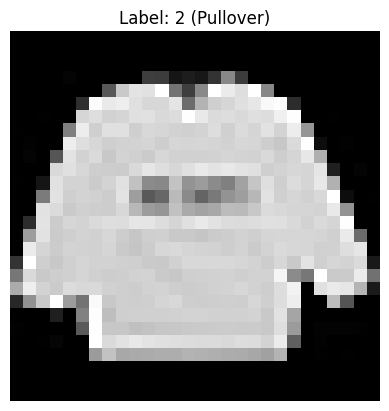

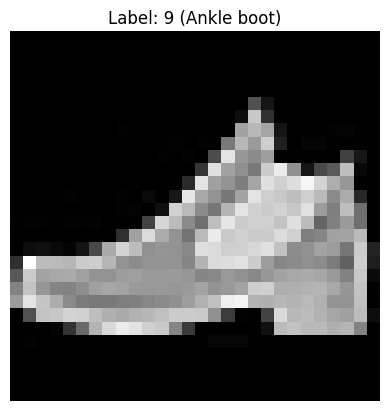

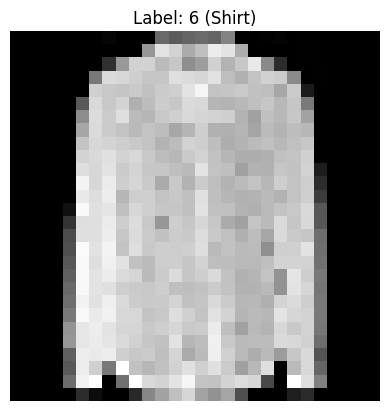

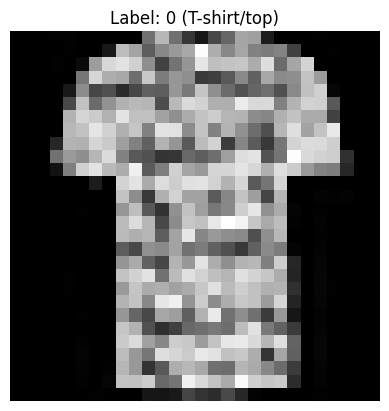

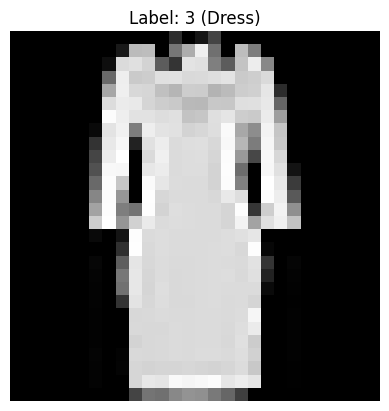

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Map label numbers to clothing names
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Function to plot a sample image
def plot_image(index):
    label = train_df.iloc[index, 0]
    pixels = train_df.iloc[index, 1:].values
    image = pixels.reshape((28, 28))

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label} ({label_map[label]})")
    plt.axis('off')
    plt.show()

# Show first 5 images
for i in range(5):
    plot_image(i)

Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize pixel values (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create validation set from training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (54000, 28, 28, 1) (54000,)
Validation set: (6000, 28, 28, 1) (6000,)
Test set: (10000, 28, 28, 1) (10000,)


Create & Train the Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

# Save the model
model.save("models/fashion_mnist_cnn.h5")

C:\Users\Jolie\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.7276 - loss: 0.7437 - val_accuracy: 0.8410 - val_loss: 0.4174
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.8361 - loss: 0.4621 - val_accuracy: 0.8767 - val_loss: 0.3473
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.8610 - loss: 0.3921 - val_accuracy: 0.8847 - val_loss: 0.3120
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8773 - loss: 0.3538 - val_accuracy: 0.8872 - val_loss: 0.3036
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.8859 - loss: 0.3274 - val_accuracy: 0.9000 - val_loss: 0.2768
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.8960 - loss: 0.2985 - val_accuracy: 0.8983 - val_loss: 0.2711
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.8984 - loss: 0.2856 - val_accuracy: 0.9007 - val_loss: 0.2671
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9051 - loss: 0.2691 - 

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.9147 - loss: 0.2343
Test Accuracy: 0.9147
Test Loss: 0.2343


Make predictions & visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


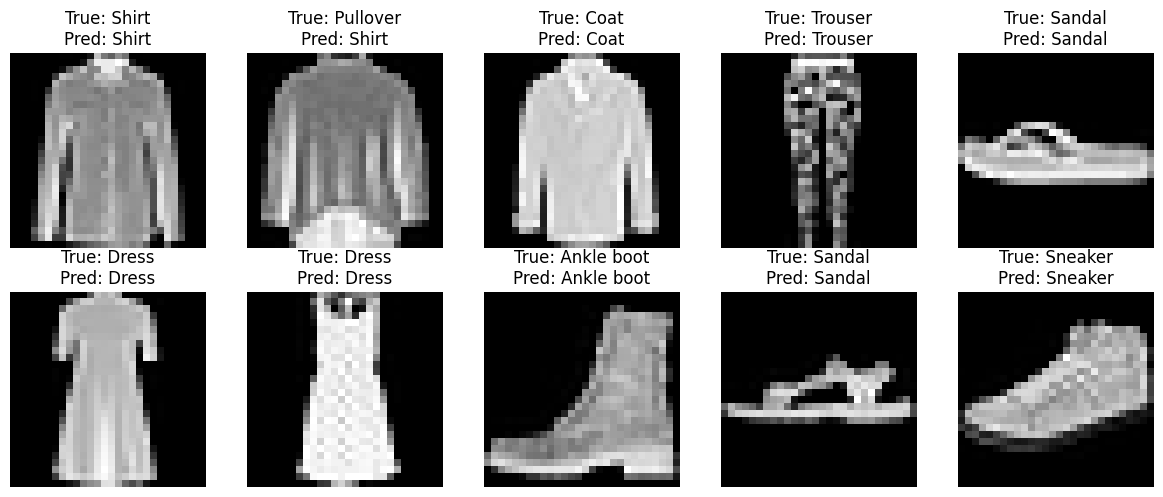

In [13]:
import numpy as np

# Predict classes for test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Map labels to class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show 10 random predictions
plt.figure(figsize=(12,5))
for i in range(10):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[predicted_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Save in modern Keras format
model.save("models/fashion_mnist_model.keras")
print("Model saved to models/fashion_mnist_model.keras")

Model saved to models/fashion_mnist_model.keras


In [15]:
# Map labels to class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
import tensorflow as tf

# Load the model we saved earlier
model = tf.keras.models.load_model("models/fashion_mnist_model.keras")

C:\Users\Jolie\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
import numpy as np
from PIL import Image

def predict_image(image_path):
    # Open image, convert to grayscale, resize to 28x28
    img = Image.open(image_path).convert('L').resize((28, 28))
    img_array = np.array(img) / 255.0  # Normalize to [0,1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Add batch & channel dims

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return class_names[predicted_class]


In [21]:
import pandas as pd
import numpy as np

# Load the raw test CSV (update path to your actual structure)
test_df = pd.read_csv("fashion_mnist_project/data/raw/fashion-mnist_test.csv")

# Separate labels and pixels
y_test = test_df['label'].values
x_test = test_df.drop('label', axis=1).values

# Normalize and reshape
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)


In [23]:
import os

os.makedirs("models", exist_ok=True)

# Save the trained model in H5 format
model.save("models/fashion_mnist_cnn.h5")
print("Model saved to models/fashion_mnist_cnn.h5")


Model saved to models/fashion_mnist_cnn.h5


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 25s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


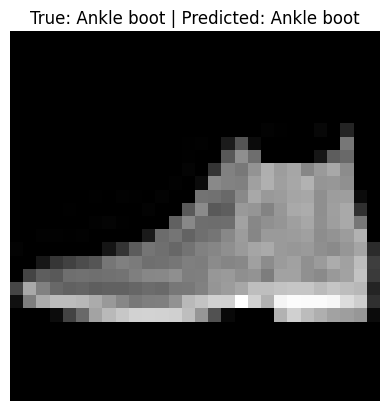

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# 1. Load model from correct location
model = tf.keras.models.load_model("./models/fashion_mnist_cnn.h5")

# 2. Load test data
(_, _), (x_test, y_test) = fashion_mnist.load_data()
x_test = x_test / 255.0  # normalize

# 3. Class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 4. Pick one test sample and predict
sample_index = 0
sample_image = x_test[sample_index].reshape(1, 28, 28, 1)
sample_label = y_test[sample_index]

prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# 5. Show result
plt.imshow(x_test[sample_index], cmap="gray")
plt.title(f"True: {class_names[sample_label]} | Predicted: {class_names[predicted_class]}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
True label: Ankle boot
Predicted label: Ankle boot


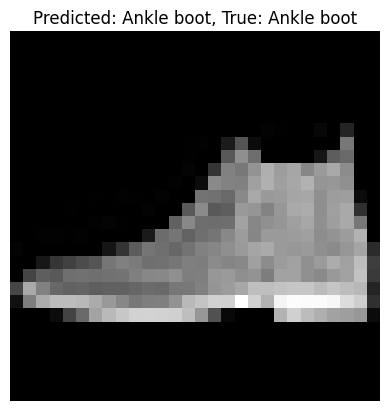

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# 1. Load the trained model
model = tf.keras.models.load_model("./models/fashion_mnist_cnn.h5")

# 2. Map label numbers to clothing names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 3. Load the Fashion MNIST test set
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Normalize to match training preprocessing
x_test = x_test / 255.0
x_test = np.expand_dims(x_test, -1)  # shape: (num_samples, 28, 28, 1)

# 4. Pick one image index to test
sample_index = 0
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

# 5. Make prediction
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

# 6. Print result
print(f"True label: {class_names[sample_label]}")
print(f"Predicted label: {class_names[predicted_label]}")

# 7. Visualize
plt.imshow(sample_image.squeeze(), cmap="gray")
plt.title(f"Predicted: {class_names[predicted_label]}, True: {class_names[sample_label]}")
plt.axis("off")
plt.show()

In [31]:
# 1. Load the model
model = tf.keras.models.load_model("./models/fashion_mnist_cnn.h5")
print(" Loaded pre-trained model.")

# 2. Compile the model again before retraining
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
print(" Model recompiled.")

# 3. Load new data (example: using part of Fashion MNIST)
(_, _), (x_test, y_test) = fashion_mnist.load_data()
x_train_new = x_test[:2000] / 255.0
x_train_new = np.expand_dims(x_train_new, -1)
y_train_new = y_test[:2000]
print(f" Loaded new data for retraining: {x_train_new.shape}")

# 4. Retrain (fine-tune)
model.fit(
    x_train_new,
    y_train_new,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

# 5. Save updated model
model.save("./models/fashion_mnist_cnn_updated.h5")
print(" Updated model saved.")


 Loaded pre-trained model.
 Model recompiled.
 Loaded new data for retraining: (2000, 28, 28, 1)
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9081 - loss: 0.2819 - val_accuracy: 0.9075 - val_loss: 0.2048
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9375 - loss: 0.2019 - val_accuracy: 0.9175 - val_loss: 0.1843
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9413 - loss: 0.1602 - val_accuracy: 0.9175 - val_loss: 0.2335


 Updated model saved.
